In [1]:
import spatialdata as sd
import spatialdata_plot
from spatialdata_io import xenium, codex
from pathlib import Path
import shutil
import sopa
import scanpy as sc
import matplotlib.pyplot as plt
import numpy as np

import sys
import os
sys.path.append(os.path.abspath('../src'))
import load_sdata

/scratch/lyarab/micromamba/envs/spatialdata/lib/python3.12/site-packages/dask/dataframe/__init__.py:31: FutureWarning: The legacy Dask DataFrame implementation is deprecated and will be removed in a future version. Set the configuration option `dataframe.query-planning` to `True` or None to enable the new Dask Dataframe implementation and silence this warning.
  warnings.warn(
/scratch/lyarab/micromamba/envs/spatialdata/lib/python3.12/site-packages/anndata/utils.py:429: FutureWarning: Importing read_text from `anndata` is deprecated. Import anndata.io.read_text instead.
  warnings.warn(msg, FutureWarning)


In [2]:
# READ IN THE CODEX SDATA
sdata_codex_columns_first_slide = load_sdata.get_codex_columns_data('0022110')
sdata_codex_columns_second_slide = load_sdata.get_codex_columns_data('0022111')

/scratch/lyarab/micromamba/envs/spatialdata/lib/python3.12/site-packages/zarr/creation.py:614: UserWarning: ignoring keyword argument 'read_only'
  compressor, fill_value = _kwargs_compat(compressor, fill_value, kwargs)
/scratch/lyarab/micromamba/envs/spatialdata/lib/python3.12/site-packages/zarr/creation.py:614: UserWarning: ignoring keyword argument 'read_only'
  compressor, fill_value = _kwargs_compat(compressor, fill_value, kwargs)
/scratch/lyarab/micromamba/envs/spatialdata/lib/python3.12/site-packages/zarr/creation.py:614: UserWarning: ignoring keyword argument 'read_only'
  compressor, fill_value = _kwargs_compat(compressor, fill_value, kwargs)
/scratch/lyarab/micromamba/envs/spatialdata/lib/python3.12/site-packages/zarr/creation.py:614: UserWarning: ignoring keyword argument 'read_only'
  compressor, fill_value = _kwargs_compat(compressor, fill_value, kwargs)
/scratch/lyarab/micromamba/envs/spatialdata/lib/python3.12/site-packages/zarr/creation.py:614: UserWarning: ignoring key

In [5]:
# CHECK THE COORDINATES
scale0 = sdata_codex_columns_first_slide['column_2'].images['ID_0022110_Scan1.er.qptiff_column_2.ome.ome']['/scale0']
img_codex_first_slide_c2 = scale0['image']
print(img_codex_first_slide_c2)

<xarray.DataArray 'image' (c: 27, y: 40622, x: 5906)> Size: 13GB
dask.array<from-zarr, shape=(27, 40622, 5906), dtype=uint16, chunksize=(1, 1024, 1024), chunktype=numpy.ndarray>
Coordinates:
  * c        (c) <U2 216B '0' '1' '2' '3' '4' '5' ... '22' '23' '24' '25' '26'
  * y        (y) float64 325kB 0.5 1.5 2.5 3.5 ... 4.062e+04 4.062e+04 4.062e+04
  * x        (x) float64 47kB 0.5 1.5 2.5 3.5 ... 5.904e+03 5.904e+03 5.906e+03
Attributes:
    transform:  {'pixels': Identity }


### Replace the c coordinate values with the true channel names

In [7]:
for i, column in enumerate(sdata_codex_columns_first_slide.keys()):
    # Get the data for each column from slide 1
    column_data_slide_1 = sdata_codex_columns_first_slide[column]
    # Generate the output path for slide 1 dynamically
    output_path_slide_1 = f"{load_sdata.CODEX_CROPPED_UPDATED}/updated_codex_sdata_0022110_column_{i+1}.zarr"
    # Run the rename function and save the updated data for slide 1
    updated_data_slide_1 = load_sdata.rename_channels(column_data_slide_1, output_path=output_path_slide_1)

for i, column in enumerate(sdata_codex_columns_second_slide.keys()):
    # Get the data for each column from slide 2
    column_data_slide_2 = sdata_codex_columns_second_slide[column]
    # Generate the output path for slide 2 dynamically
    output_path_slide_2 = f"{load_sdata.CODEX_CROPPED_UPDATED}/updated_codex_sdata_0022111_column_{i+1}.zarr"
    # Run the rename function and save the updated data for slide 2
    updated_data_slide_2 = load_sdata.rename_channels(column_data_slide_2, output_path=output_path_slide_2)

<xarray.DataArray 'c' (c: 27)> Size: 2kB
array(['DAPI', 'FoxP3', 'aSMA', 'CD4', 'CD8', 'CD31', 'CD11c', 'IFNG',
       'Pan-Cytokeratin', 'CD68', 'CD20', 'CD66b', 'TNFa', 'CD45RO', 'CD14',
       'CD11b', 'Vimentin', 'CD163', 'IL10', 'CD45', 'CCR7', 'CD38', 'CD69',
       'Podoplanin', 'PNAd', 'CD16', 'CXCL13'], dtype='<U15')
Coordinates:
  * c        (c) <U15 2kB 'DAPI' 'FoxP3' 'aSMA' 'CD4' ... 'PNAd' 'CD16' 'CXCL13'
<xarray.DataArray 'c' (c: 27)> Size: 2kB
array(['DAPI', 'FoxP3', 'aSMA', 'CD4', 'CD8', 'CD31', 'CD11c', 'IFNG',
       'Pan-Cytokeratin', 'CD68', 'CD20', 'CD66b', 'TNFa', 'CD45RO', 'CD14',
       'CD11b', 'Vimentin', 'CD163', 'IL10', 'CD45', 'CCR7', 'CD38', 'CD69',
       'Podoplanin', 'PNAd', 'CD16', 'CXCL13'], dtype='<U15')
Coordinates:
  * c        (c) <U15 2kB 'DAPI' 'FoxP3' 'aSMA' 'CD4' ... 'PNAd' 'CD16' 'CXCL13'
<xarray.DataArray 'c' (c: 27)> Size: 2kB
array(['DAPI', 'FoxP3', 'aSMA', 'CD4', 'CD8', 'CD31', 'CD11c', 'IFNG',
       'Pan-Cytokeratin', 'CD68', 'CD20', 'C

/scratch/lyarab/micromamba/envs/spatialdata/lib/python3.12/site-packages/spatialdata/_core/_elements.py:71: UserWarning: Key `ID_0022110_Scan1.er.qptiff_column_1.ome.ome` already exists. Overwriting it in-memory.
  self._check_key(key, self.keys(), self._shared_keys)


INFO     The SpatialData object is not self-contained (i.e. it contains some elements that are Dask-backed from    
         locations outside                                                                                         
         /media/Lynn/data/SpatialData/CODEX_cropped_updated/updated_codex_sdata_0022110_column_1.zarr). Please see 
         the documentation of `is_self_contained()` to understand the implications of working with SpatialData     
         objects that are not self-contained.                                                                      
INFO     The Zarr backing store has been changed from                                                              
         /media/Lynn/data/SpatialData/CODEX_cropped/ID_0022110_Scan1.er.qptiff_column_1.ome.ome.zarr the new file  
         path: /media/Lynn/data/SpatialData/CODEX_cropped_updated/updated_codex_sdata_0022110_column_1.zarr        
<xarray.DataArray 'c' (c: 27)> Size: 2kB
array(['DAPI', 'FoxP3', 'aSMA',

/scratch/lyarab/micromamba/envs/spatialdata/lib/python3.12/site-packages/spatialdata/_core/_elements.py:71: UserWarning: Key `ID_0022110_Scan1.er.qptiff_column_2.ome.ome` already exists. Overwriting it in-memory.
  self._check_key(key, self.keys(), self._shared_keys)


INFO     The SpatialData object is not self-contained (i.e. it contains some elements that are Dask-backed from    
         locations outside                                                                                         
         /media/Lynn/data/SpatialData/CODEX_cropped_updated/updated_codex_sdata_0022110_column_2.zarr). Please see 
         the documentation of `is_self_contained()` to understand the implications of working with SpatialData     
         objects that are not self-contained.                                                                      
INFO     The Zarr backing store has been changed from                                                              
         /media/Lynn/data/SpatialData/CODEX_cropped_updated/updated_codex_sdata_c2_new.zarr the new file path:     
         /media/Lynn/data/SpatialData/CODEX_cropped_updated/updated_codex_sdata_0022110_column_2.zarr              
<xarray.DataArray 'c' (c: 27)> Size: 2kB
array(['DAPI', 'FoxP3', 'aSMA',

/scratch/lyarab/micromamba/envs/spatialdata/lib/python3.12/site-packages/spatialdata/_core/_elements.py:71: UserWarning: Key `ID_0022110_Scan1.er.qptiff_column_3.ome.ome` already exists. Overwriting it in-memory.
  self._check_key(key, self.keys(), self._shared_keys)


INFO     The SpatialData object is not self-contained (i.e. it contains some elements that are Dask-backed from    
         locations outside                                                                                         
         /media/Lynn/data/SpatialData/CODEX_cropped_updated/updated_codex_sdata_0022110_column_3.zarr). Please see 
         the documentation of `is_self_contained()` to understand the implications of working with SpatialData     
         objects that are not self-contained.                                                                      
INFO     The Zarr backing store has been changed from                                                              
         /media/Lynn/data/SpatialData/CODEX_cropped/ID_0022110_Scan1.er.qptiff_column_3.ome.ome.zarr the new file  
         path: /media/Lynn/data/SpatialData/CODEX_cropped_updated/updated_codex_sdata_0022110_column_3.zarr        
<xarray.DataArray 'c' (c: 27)> Size: 2kB
array(['DAPI', 'FoxP3', 'aSMA',

/scratch/lyarab/micromamba/envs/spatialdata/lib/python3.12/site-packages/spatialdata/_core/_elements.py:71: UserWarning: Key `ID_0022110_Scan1.er.qptiff_column_4.ome.ome` already exists. Overwriting it in-memory.
  self._check_key(key, self.keys(), self._shared_keys)


INFO     The SpatialData object is not self-contained (i.e. it contains some elements that are Dask-backed from    
         locations outside                                                                                         
         /media/Lynn/data/SpatialData/CODEX_cropped_updated/updated_codex_sdata_0022110_column_4.zarr). Please see 
         the documentation of `is_self_contained()` to understand the implications of working with SpatialData     
         objects that are not self-contained.                                                                      
INFO     The Zarr backing store has been changed from                                                              
         /media/Lynn/data/SpatialData/CODEX_cropped/ID_0022110_Scan1.er.qptiff_column_4.ome.ome.zarr the new file  
         path: /media/Lynn/data/SpatialData/CODEX_cropped_updated/updated_codex_sdata_0022110_column_4.zarr        
<xarray.DataArray 'c' (c: 27)> Size: 2kB
array(['DAPI', 'FoxP3', 'aSMA',

/scratch/lyarab/micromamba/envs/spatialdata/lib/python3.12/site-packages/spatialdata/_core/_elements.py:71: UserWarning: Key `ID_0022111_Scan1.er.qptiff_column_1.ome.ome` already exists. Overwriting it in-memory.
  self._check_key(key, self.keys(), self._shared_keys)


INFO     The SpatialData object is not self-contained (i.e. it contains some elements that are Dask-backed from    
         locations outside                                                                                         
         /media/Lynn/data/SpatialData/CODEX_cropped_updated/updated_codex_sdata_0022111_column_1.zarr). Please see 
         the documentation of `is_self_contained()` to understand the implications of working with SpatialData     
         objects that are not self-contained.                                                                      
INFO     The Zarr backing store has been changed from                                                              
         /media/Lynn/data/SpatialData/CODEX_cropped/ID_0022111_Scan1.er.qptiff_column_1.ome.ome.zarr the new file  
         path: /media/Lynn/data/SpatialData/CODEX_cropped_updated/updated_codex_sdata_0022111_column_1.zarr        
<xarray.DataArray 'c' (c: 27)> Size: 2kB
array(['DAPI', 'FoxP3', 'aSMA',

/scratch/lyarab/micromamba/envs/spatialdata/lib/python3.12/site-packages/spatialdata/_core/_elements.py:71: UserWarning: Key `ID_0022111_Scan1.er.qptiff_column_2.ome.ome` already exists. Overwriting it in-memory.
  self._check_key(key, self.keys(), self._shared_keys)


INFO     The SpatialData object is not self-contained (i.e. it contains some elements that are Dask-backed from    
         locations outside                                                                                         
         /media/Lynn/data/SpatialData/CODEX_cropped_updated/updated_codex_sdata_0022111_column_2.zarr). Please see 
         the documentation of `is_self_contained()` to understand the implications of working with SpatialData     
         objects that are not self-contained.                                                                      
INFO     The Zarr backing store has been changed from                                                              
         /media/Lynn/data/SpatialData/CODEX_cropped/ID_0022111_Scan1.er.qptiff_column_2.ome.ome.zarr the new file  
         path: /media/Lynn/data/SpatialData/CODEX_cropped_updated/updated_codex_sdata_0022111_column_2.zarr        
<xarray.DataArray 'c' (c: 27)> Size: 2kB
array(['DAPI', 'FoxP3', 'aSMA',

/scratch/lyarab/micromamba/envs/spatialdata/lib/python3.12/site-packages/spatialdata/_core/_elements.py:71: UserWarning: Key `ID_0022111_Scan1.er.qptiff_column_3.ome.ome` already exists. Overwriting it in-memory.
  self._check_key(key, self.keys(), self._shared_keys)


INFO     The SpatialData object is not self-contained (i.e. it contains some elements that are Dask-backed from    
         locations outside                                                                                         
         /media/Lynn/data/SpatialData/CODEX_cropped_updated/updated_codex_sdata_0022111_column_3.zarr). Please see 
         the documentation of `is_self_contained()` to understand the implications of working with SpatialData     
         objects that are not self-contained.                                                                      
INFO     The Zarr backing store has been changed from                                                              
         /media/Lynn/data/SpatialData/CODEX_cropped/ID_0022111_Scan1.er.qptiff_column_3.ome.ome.zarr the new file  
         path: /media/Lynn/data/SpatialData/CODEX_cropped_updated/updated_codex_sdata_0022111_column_3.zarr        
<xarray.DataArray 'c' (c: 27)> Size: 2kB
array(['DAPI', 'FoxP3', 'aSMA',

/scratch/lyarab/micromamba/envs/spatialdata/lib/python3.12/site-packages/spatialdata/_core/_elements.py:71: UserWarning: Key `ID_0022111_Scan1.er.qptiff_column_4.ome.ome` already exists. Overwriting it in-memory.
  self._check_key(key, self.keys(), self._shared_keys)


INFO     The SpatialData object is not self-contained (i.e. it contains some elements that are Dask-backed from    
         locations outside                                                                                         
         /media/Lynn/data/SpatialData/CODEX_cropped_updated/updated_codex_sdata_0022111_column_4.zarr). Please see 
         the documentation of `is_self_contained()` to understand the implications of working with SpatialData     
         objects that are not self-contained.                                                                      
INFO     The Zarr backing store has been changed from                                                              
         /media/Lynn/data/SpatialData/CODEX_cropped/ID_0022111_Scan1.er.qptiff_column_4.ome.ome.zarr the new file  
         path: /media/Lynn/data/SpatialData/CODEX_cropped_updated/updated_codex_sdata_0022111_column_4.zarr        


In [4]:
sdata_codex_updated_s1 = load_sdata.get_codex_updated_columns_data('0022110')
sdata_codex_updated_s2 = load_sdata.get_codex_updated_columns_data('0022111')

/scratch/lyarab/micromamba/envs/spatialdata/lib/python3.12/site-packages/zarr/creation.py:614: UserWarning: ignoring keyword argument 'read_only'
  compressor, fill_value = _kwargs_compat(compressor, fill_value, kwargs)
/scratch/lyarab/micromamba/envs/spatialdata/lib/python3.12/site-packages/zarr/creation.py:614: UserWarning: ignoring keyword argument 'read_only'
  compressor, fill_value = _kwargs_compat(compressor, fill_value, kwargs)
/scratch/lyarab/micromamba/envs/spatialdata/lib/python3.12/site-packages/zarr/creation.py:614: UserWarning: ignoring keyword argument 'read_only'
  compressor, fill_value = _kwargs_compat(compressor, fill_value, kwargs)
/scratch/lyarab/micromamba/envs/spatialdata/lib/python3.12/site-packages/zarr/creation.py:614: UserWarning: ignoring keyword argument 'read_only'
  compressor, fill_value = _kwargs_compat(compressor, fill_value, kwargs)
/scratch/lyarab/micromamba/envs/spatialdata/lib/python3.12/site-packages/zarr/creation.py:614: UserWarning: ignoring key

### Check that the channel names match

In [2]:
def contrast_stretch(image, low_perc=2, high_perc=98):
    """Rescale intensity using percentiles to enhance contrast."""
    low, high = np.percentile(image, (low_perc, high_perc))
    return np.clip((image - low) / (high - low), 0, 1)

In [6]:
scale0 = sdata_codex_updated_s1['column_1'].images['ID_0022110_Scan1.er.qptiff_column_1.ome.ome']['/scale0']
img_codex_s1_c1 = scale0['image']
print(img_codex_s1_c1)

<xarray.DataArray 'image' (c: 27, y: 34725, x: 4676)> Size: 9GB
dask.array<from-zarr, shape=(27, 34725, 4676), dtype=uint16, chunksize=(1, 1024, 1024), chunktype=numpy.ndarray>
Coordinates:
  * c        (c) <U15 2kB 'DAPI' 'FoxP3' 'aSMA' 'CD4' ... 'PNAd' 'CD16' 'CXCL13'
  * y        (y) float64 278kB 0.5 1.5 2.5 3.5 ... 3.472e+04 3.472e+04 3.472e+04
  * x        (x) float64 37kB 0.5 1.5 2.5 3.5 ... 4.674e+03 4.674e+03 4.676e+03
Attributes:
    transform:  {'pixels': Identity }


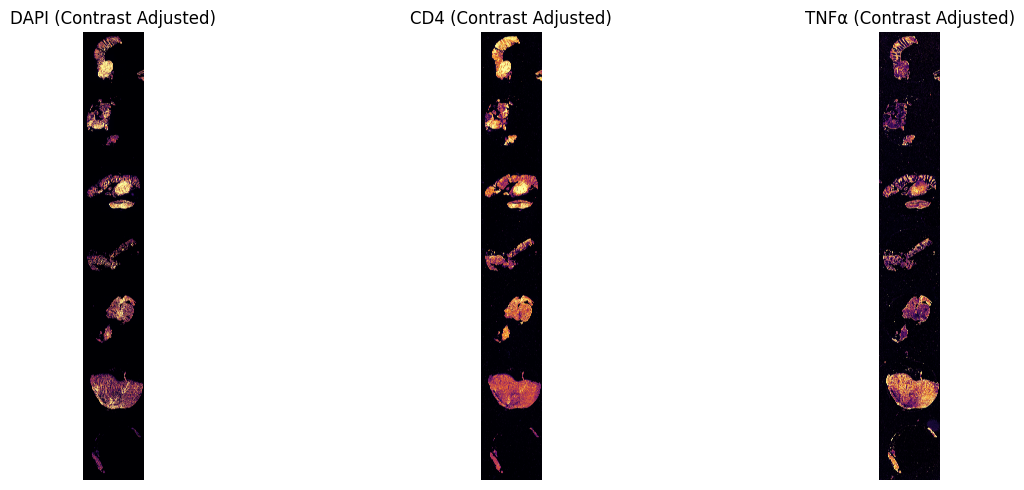

In [7]:
# Extract images for DAPI, CD4, and TNFα
img_dapi = img_codex_s1_c1.sel(c="DAPI").compute().values
img_cd4 = img_codex_s1_c1.sel(c="CD4").compute().values
img_tnfa = img_codex_s1_c1.sel(c="TNFa").compute().values

# Rescale contrast
img_dapi_rescaled = contrast_stretch(img_dapi.reshape(img_codex_s1_c1.sizes["y"], img_codex_s1_c1.sizes["x"]))
img_cd4_rescaled = contrast_stretch(img_cd4.reshape(img_codex_s1_c1.sizes["y"], img_codex_s1_c1.sizes["x"]))
img_tnfa_rescaled = contrast_stretch(img_tnfa.reshape(img_codex_s1_c1.sizes["y"], img_codex_s1_c1.sizes["x"]))

# Display images side by side
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(img_dapi_rescaled, cmap="inferno")
axes[0].set_title("DAPI (Contrast Adjusted)")
axes[0].axis("off")

axes[1].imshow(img_cd4_rescaled, cmap="inferno")
axes[1].set_title("CD4 (Contrast Adjusted)")
axes[1].axis("off")

axes[2].imshow(img_tnfa_rescaled, cmap="inferno")
axes[2].set_title("TNFα (Contrast Adjusted)")
axes[2].axis("off")

plt.tight_layout()
plt.show()
